Predicted Diseases:
{'Heart Disease': 1.1383443, 'Metabolic Syndrome': 0.4984061}

Food Recommendations:
Fruits(g): 210.0


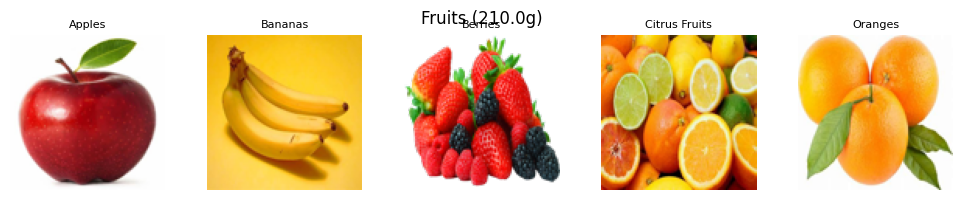

Whole Grains(g): 150.0


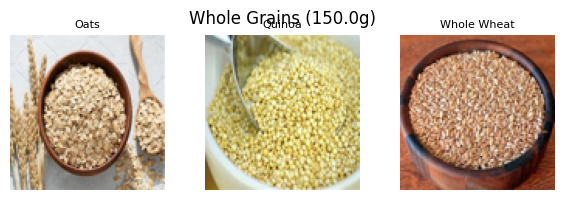

Leafy Greens(g): 150.0


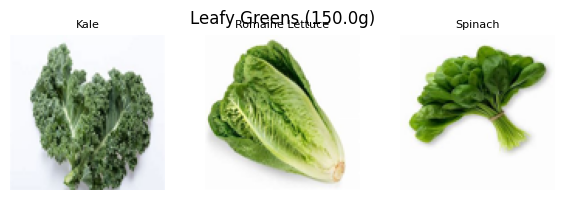

Nuts(g): 45.0


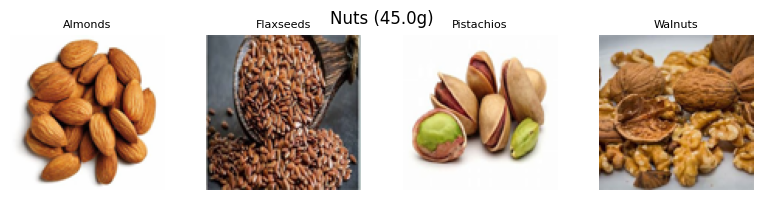

In [1]:
import joblib
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Path to the food image folders
base_path = r"C:\Users\rajes\OneDrive\Desktop\Food Recommendation\Food_names"

# Define the features expected by the model
features = ['Age', 'Gender', 'BP', 'Cholesterol', 'Heart Rate', 'Glucose', 'Insulin', 'BMI']

# Define food recommendations based on diseases (same as before)

food_recommendations = {
    'Heart Disease': {
        'Fruits(g)': 90.0,
        'Fruits': 'Berries, Oranges, Apples, Bananas',
        'Whole Grains(g)': 0.0,
        'Whole Grains': 'N/A',
        'Leafy Greens(g)': 0.0,
        'Leafy Greens': 'N/A',
        'Nuts(g)': 22.5,
        'Nuts': 'Almonds, Walnuts, Pistachios'
    },
    'Hypertension': {
        'Fruits(g)': 150.0,
        'Fruits': 'Bananas, Apples, Citrus Fruits',
        'Whole Grains(g)': 112.5,
        'Whole Grains': 'Whole Wheat, Oats, Barley',
        'Leafy Greens(g)': 150.0,
        'Leafy Greens': 'Spinach, Kale, Romaine Lettuce',
        'Nuts(g)': 22.5,
        'Nuts': 'Almonds, Walnuts, Flaxseeds'
    },
    'Diabetes': {
        'Fruits(g)': 90.0,
        'Fruits': 'Berries, Apples, Pears, Oranges',
        'Whole Grains(g)': 150.0,
        'Whole Grains': 'Quinoa, Brown Rice, Oats',
        'Leafy Greens(g)': 150.0,
        'Leafy Greens': 'Spinach, Kale, Swiss Chard',
        'Nuts(g)': 22.5,
        'Nuts': 'Almonds, Walnuts, Chia Seeds'
    },
    'Stroke': {
        'Fruits(g)': 120.0,
        'Fruits': 'Citrus Fruits, Apples, Bananas',
        'Whole Grains(g)': 150.0,
        'Whole Grains': 'Oats, Brown Rice, Whole Wheat',
        'Leafy Greens(g)': 150.0,
        'Leafy Greens': 'Kale, Spinach, Collard Greens',
        'Nuts(g)': 22.5,
        'Nuts': 'Walnuts, Almonds, Peanuts'
    },
    'Fatty Liver': {
        'Fruits(g)': 90.0,
        'Fruits': 'Berries, Apples, Grapefruit, Oranges',
        'Whole Grains(g)': 112.5,
        'Whole Grains': 'Oats, Brown Rice, Barley',
        'Leafy Greens(g)': 150.0,
        'Leafy Greens': 'Spinach, Kale, Arugula',
        'Nuts(g)': 22.5,
        'Nuts': 'Almonds, Walnuts, Sunflower Seeds'
    },
    'Metabolic Syndrome': {
        'Fruits(g)': 120.0,
        'Fruits': 'Berries, Citrus Fruits, Apples',
        'Whole Grains(g)': 150.0,
        'Whole Grains': 'Quinoa, Whole Wheat, Oats',
        'Leafy Greens(g)': 150.0,
        'Leafy Greens': 'Kale, Spinach, Romaine Lettuce',
        'Nuts(g)': 22.5,
        'Nuts': 'Almonds, Walnuts, Flaxseeds'
    }
}
def display_food_images(food_category, food_list, grams):
    # Commented out the print statement to avoid duplication
    # print(f"{food_category}(g): {grams}")
    
    food_items = food_list.split(', ')
    
    # Set up the figure size for each category based on the number of images
    fig, axes = plt.subplots(1, len(food_items), figsize=(len(food_items) * 2, 2))
    fig.suptitle(f"{food_category} ({grams}g)")
    
    if len(food_items) == 1:
        axes = [axes]
    
    for idx, food_item in enumerate(food_items):
        food_item_cleaned = food_item  # Keep original names
        
        # Define image paths
        image_path_jpg = os.path.join(base_path, food_category, f"{food_item_cleaned}.jpg")
        image_path_png = os.path.join(base_path, food_category, f"{food_item_cleaned}.png")
        
        img = None  # Clear image cache before loading each time
        
        # Check if the image exists for both formats
        if os.path.exists(image_path_jpg):
            try:
                img = Image.open(image_path_jpg)
            except Exception as e:
                print(f"Error loading {food_item} from JPG: {e}")
                img = None
        elif os.path.exists(image_path_png):
            try:
                img = Image.open(image_path_png)
            except Exception as e:
                print(f"Error loading {food_item} from PNG: {e}")
                img = None
        else:
            print(f"Image for {food_item} not found in {food_category}. Showing placeholder.")
            img = Image.new('RGB', (100, 100), color='gray')  # Placeholder if not found

        # Resize and display image
        if img:
            img = img.resize((100, 100))
            axes[idx].imshow(img)
            axes[idx].axis('off')
            axes[idx].set_title(food_item, fontsize=8)

        # Clear the image after each iteration
        if img:
            img.close()

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()
# Example usage for vegetable images

model = joblib.load('xgboost_best_model.pkl')

# Function to predict diseases and get food recommendations
def predict_diseases(user_input, threshold=0.4):
    user_df = pd.DataFrame([user_input])
    
    # Handle missing values (if any)
    user_df.fillna(0, inplace=True)
    
    # Make predictions using the loaded model
    predictions = model.predict(user_df[features])
    
    # Map prediction results to disease names
    diseases = ['Heart Disease', 'Diabetes', 'Stroke', 'Fatty Liver', 'Metabolic Syndrome', 'Hypertension']
    
    # Filter diseases with predicted scores greater than the threshold
    predicted_diseases = {disease: score for disease, score in zip(diseases, predictions[0]) if score > threshold}
    
    # Get food recommendations based on predicted diseases
    combined_food_recommendations = {
        'Fruits(g)': 0.0,
        'Fruits': '',
        'Whole Grains(g)': 0.0,
        'Whole Grains': '',
        'Leafy Greens(g)': 0.0,
        'Leafy Greens': '',
        'Nuts(g)': 0.0,
        'Nuts': ''
    }

    for disease in predicted_diseases.keys():
        if disease in food_recommendations:
            recommendations = food_recommendations[disease]
            for key, value in recommendations.items():
                if 'g' in key:
                    combined_food_recommendations[key] += value
                else:
                    food_items = set(combined_food_recommendations[key].split(', ')) if combined_food_recommendations[key] else set()
                    if value != 'N/A':
                        food_items.update(value.split(', '))
                    combined_food_recommendations[key] = ', '.join(sorted(food_items))  # Ensure items are properly formatted

    return predicted_diseases, combined_food_recommendations

# Example user input
user_input = {
    'Age': 76,
    'Gender': 1,
    'BP': 60,
    'Cholesterol': 70,
    'Heart Rate': 85,
    'Glucose': 150,
    'Insulin': 78,
    'BMI': 30
}

# Predict diseases and get combined food recommendations based on user input
predicted_diseases, combined_food_recommendations = predict_diseases(user_input)

print("Predicted Diseases:")
print(predicted_diseases)

# Print and display the combined food recommendations
print("\nFood Recommendations:")
for key, value in combined_food_recommendations.items():
    # Only display the grams-related key (e.g., 'Fruits(g)') and its corresponding food items once
    if 'g' in key:
        # Print the weight for the food category
        print(f"{key}: {value}")
    else:
        # Check if there are valid food items before calling display_food_images
        if value and 'N/A' not in value:  # Ensure there's valid data
            # Print to debug where the images are being displayed
            # Display food images and grams only once
            display_food_images(key, value, combined_food_recommendations[key + '(g)'])
        else:
            print(f"No valid food recommendations for {key}.")
